Missing values:
 Timestamp              0
Temperature_Celsius    0
Relative_Humidity      0
dtype: int64
Jumlah duplikat: 0
Outliers suhu: 84
Outliers kelembaban: 52


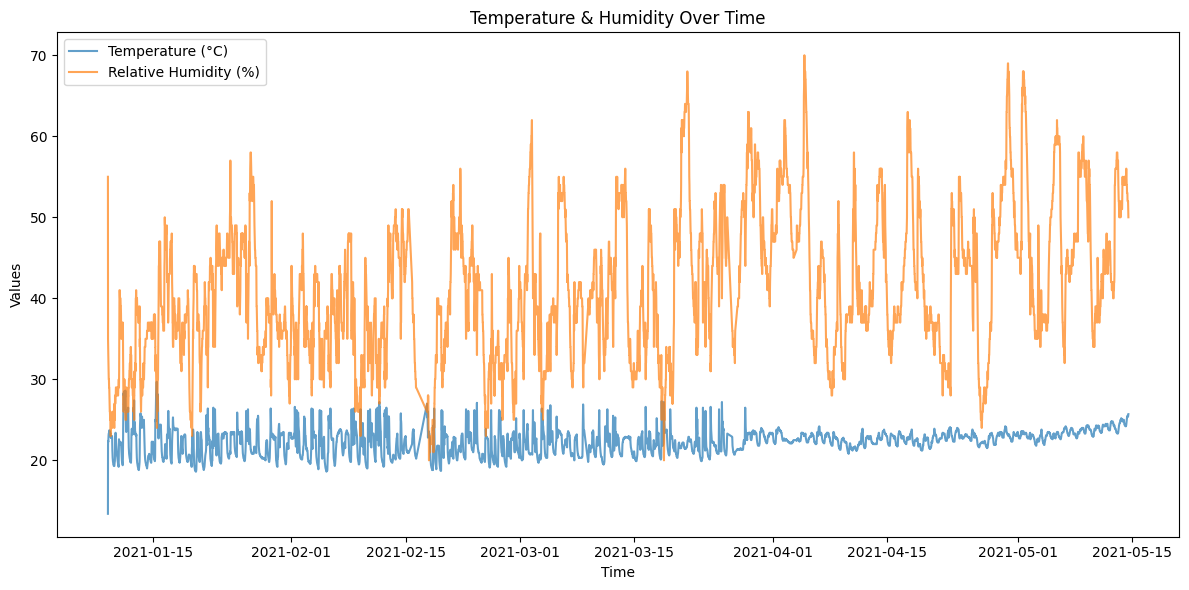


Statistik Deskriptif:
       Temperature_Celsius  Relative_Humidity
mean            22.538141          40.312286
min             13.400000          20.000000
max             29.700000          70.000000


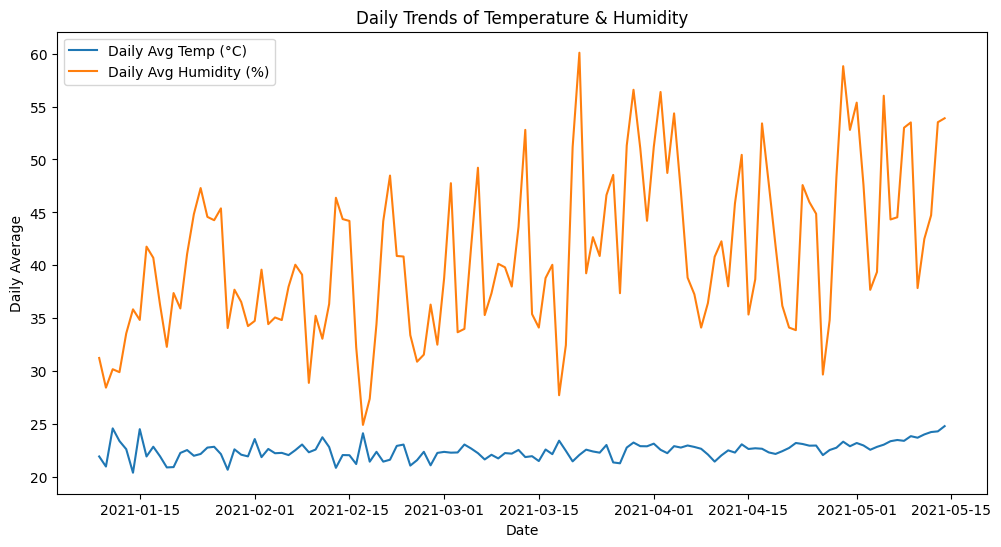


Korelasi suhu & kelembaban: -0.09486075984685989


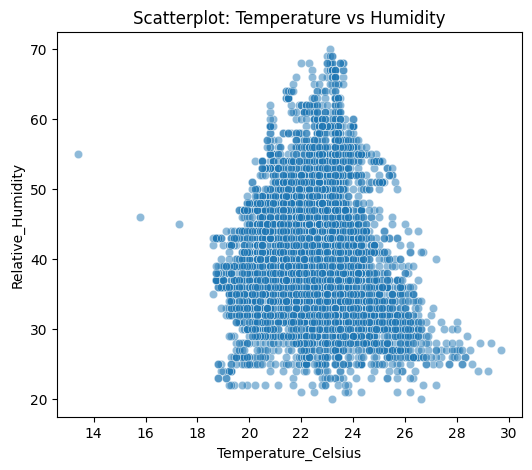

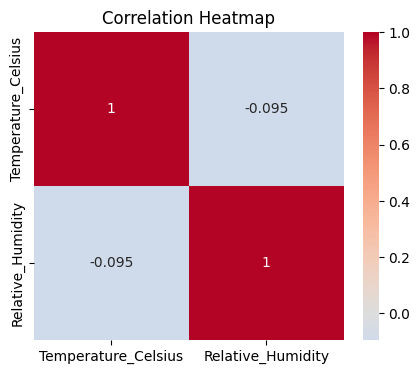

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = "-data.csv"
df = pd.read_csv(file_path)

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

print("Missing values:\n", df.isnull().sum())

print("Jumlah duplikat:", df.duplicated().sum())
df = df.drop_duplicates()

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

outliers_temp = detect_outliers_iqr(df['Temperature_Celsius'])
outliers_humidity = detect_outliers_iqr(df['Relative_Humidity'])

print("Outliers suhu:", outliers_temp)
print("Outliers kelembaban:", outliers_humidity)

plt.figure(figsize=(12,6))
plt.plot(df['Timestamp'], df['Temperature_Celsius'], label="Temperature (°C)", alpha=0.7)
plt.plot(df['Timestamp'], df['Relative_Humidity'], label="Relative Humidity (%)", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Temperature & Humidity Over Time")
plt.legend()
plt.tight_layout()
plt.show()

stats_summary = df[['Temperature_Celsius','Relative_Humidity']].agg(['mean','min','max'])
print("\nStatistik Deskriptif:\n", stats_summary)

df.set_index('Timestamp', inplace=True)
daily_avg = df.resample('D').mean()

plt.figure(figsize=(12,6))
plt.plot(daily_avg.index, daily_avg['Temperature_Celsius'], label="Daily Avg Temp (°C)")
plt.plot(daily_avg.index, daily_avg['Relative_Humidity'], label="Daily Avg Humidity (%)")
plt.xlabel("Date")
plt.ylabel("Daily Average")
plt.title("Daily Trends of Temperature & Humidity")
plt.legend()
plt.show()

correlation = df['Temperature_Celsius'].corr(df['Relative_Humidity'])
print("\nKorelasi suhu & kelembaban:", correlation)

plt.figure(figsize=(6,5))
sns.scatterplot(x='Temperature_Celsius', y='Relative_Humidity', data=df, alpha=0.5)
plt.title("Scatterplot: Temperature vs Humidity")
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(df[['Temperature_Celsius','Relative_Humidity']].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()
